In [1]:
#Import depednecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy
import requests
import json
import datetime

#Import API key
from config import weather_api_key

In [2]:
#Function for plotting
def scatterPlotting(dataFrame, x_axis, y_axis):
    date = datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
    plt.scatter(dataFrame[x_axis], dataFrame[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'City {x_axis} vs {y_axis} - {date}')
    plt.grid(axis="both")
    plt.xlim(-90, 90)
    plt.savefig(f'../output_data/{y_axis}_vs_{x_axis}.png')
    plt.show()

In [3]:
#Function for plotting linea regression
def linearRegressionPlotting(dataFrame, x_axis, y_axis, xfig, yfig, hemisphere):
    date = datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
    x_values = dataFrame[x_axis]
    y_values = dataFrame[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(xfig, yfig), xycoords='figure points', fontsize=15, color="red")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{hemisphere} - {y_axis} vs Latitude - Linear Regression - {date}')
    plt.savefig(f'../output_data/{hemisphere}_{y_axis}_vs_{x_axis}.png')
    plt.show()

In [4]:
#Output csv file
output_file = "../output_data/cities_Weather.csv"


In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [6]:
#Base url for open weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Lists for API responses
json_cities = []
json_lats = []
json_longs = []
json_temps = []
json_clouds = []
json_humidity = []
json_wind = []

for city in cities:
    #Params for API requests
    params = {"q":city, "appid":weather_api_key, "units":"Imperial"}
    response = requests.get(base_url, params).json()
    if("name" in response and "id" in response):
        print(f'Processing... {response["name"]} | Id: {response["id"]}')
        json_cities.append(response["name"])
        json_lats.append(response["coord"]["lat"])
        json_longs.append(response["coord"]["lon"])
        json_temps.append(response["main"]["temp"])
        json_humidity.append(response["main"]["humidity"])
        json_wind.append(response["wind"]["speed"])
        json_clouds.append(response["clouds"]["all"])
    else:
        print("City not found")

print(len(json_cities))

City not found
Processing... Cherskiy | Id: 2126199
Processing... Touros | Id: 3386213
Processing... Belaya Gora | Id: 2126785
Processing... Hilo | Id: 5855927
Processing... Lingsugūr | Id: 1264890
Processing... Vaini | Id: 4032243
Processing... Esperance | Id: 2071860
City not found
Processing... Port Alfred | Id: 964432
Processing... Kapaa | Id: 5848280
Processing... Castro | Id: 3466704
Processing... Mar del Plata | Id: 3430863
Processing... Zeya | Id: 2012593
Processing... Marshall | Id: 4074736
Processing... Puerto Gaitán | Id: 3769976
Processing... Puerto Ayora | Id: 3652764
Processing... Rio Verde de Mato Grosso | Id: 3451051
Processing... Noumea | Id: 2139521
Processing... Ariquemes | Id: 3665199
Processing... Mahon | Id: 2514301
Processing... Balabac | Id: 1728675
Processing... Tasiilaq | Id: 3424607
Processing... Lebu | Id: 3883457
Processing... Ayaviri | Id: 3946985
Processing... Lompoc | Id: 5367788
Processing... Vargashi | Id: 1487784
Processing... Atuona | Id: 4020109
Pro

Processing... Hong Kong | Id: 1819729
City not found
City not found
Processing... Bemidji | Id: 5017822
Processing... George Town | Id: 1735106
Processing... Niimi | Id: 1855416
City not found
Processing... Leningradskiy | Id: 2123814
Processing... Dunedin | Id: 2191562
City not found
Processing... Sisimiut | Id: 3419842
Processing... Wenzhou | Id: 1791388
Processing... Algete | Id: 3130383
City not found
Processing... Lauria | Id: 3175034
Processing... Vredendal | Id: 3359736
Processing... Kendari | Id: 1640344
Processing... Bathsheba | Id: 3374083
Processing... Micheweni | Id: 153955
Processing... Sambava | Id: 1056899
Processing... Ekhabi | Id: 2122614
Processing... Cayenne | Id: 3382160
Processing... Brae | Id: 2654970
Processing... Cockburn Town | Id: 3576994
Processing... Biltine | Id: 244878
Processing... Port Elizabeth | Id: 964420
City not found
Processing... St Albans | Id: 2638867
Processing... Kachīry | Id: 1523662
Processing... Qiyang | Id: 1797417
Processing... Hofn | Id:

Processing... Paita | Id: 3694112
Processing... Igrim | Id: 1505965
Processing... Ponnāni | Id: 1259411
Processing... Kang | Id: 933692
Processing... Hammerfest | Id: 779683
Processing... Iskateley | Id: 866062
Processing... Shahr-e Kord | Id: 115770
Processing... Nhulunbuy | Id: 2064735
Processing... Husavik | Id: 2629833
Processing... Myski | Id: 1498129
Processing... Khatanga | Id: 2022572
Processing... Maniitsoq | Id: 3421982
Processing... Holland | Id: 4996248
Processing... Tautira | Id: 4033557
Processing... San-Pédro | Id: 2282006
Processing... Taoudenni | Id: 2450173
Processing... Payson | Id: 5779548
Processing... Colquechaca | Id: 3919720
City not found
Processing... Sørland | Id: 3137469
Processing... Rayong | Id: 1607016
Processing... Shingū | Id: 1847947
Processing... Poum | Id: 2138555
Processing... Mastic Beach | Id: 5126209
Processing... Lamar | Id: 4705086
Processing... Mango | Id: 4163318
City not found
Processing... Altay | Id: 1529651
Processing... Saint Anthony | I

In [7]:
#Create dataframe with responses data
weather_df = pd.DataFrame({"City": json_cities, "Latitude":json_lats, "Longitude":json_longs, "Temperature (F)":json_temps, 
                           "Humidity %":json_humidity, "Cloudiness %":json_clouds, "Wind Speed (mph)":json_wind})
weather_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,Cherskiy,68.75,161.30,9.81,91,7,9.22
1,Touros,-5.20,-35.46,77.00,94,40,4.70
2,Belaya Gora,68.53,146.42,12.92,91,86,2.26
3,Hilo,19.73,-155.09,68.07,73,75,6.93
4,Lingsugūr,16.17,76.52,85.93,23,73,8.34


In [8]:
#Export data to a csv file
weather_df.to_csv(output_file, index=False, header=True)

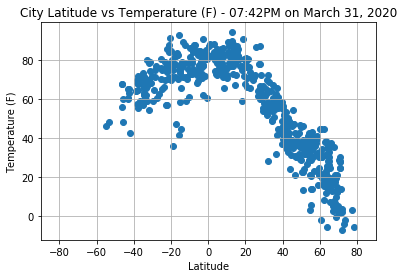

In [9]:
#Temperature (F) vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Temperature (F)")

#Analizing temperature vs latitude show as that as latitude increases and is nearer to 90 the temperature is lower.

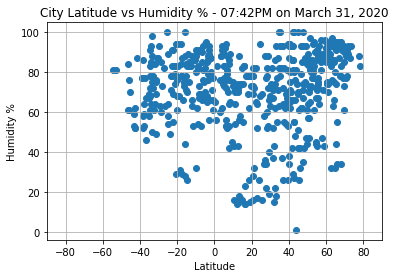

In [10]:
#Humidity % vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Humidity %")

#Humidity vs latitude shows that cities from the sample that are between -40 and 70 latitude have more humidity percentage

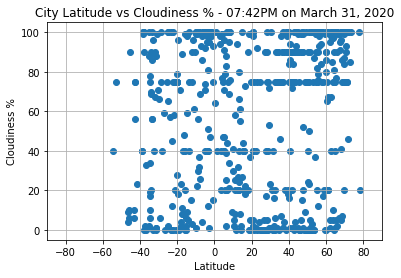

In [11]:
#Cloudiness % vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Cloudiness %")

#Cloudiness vs latitude between -40 and 70 latitude, the cities with higher and lower temperatures got tmore cloudiness percentage

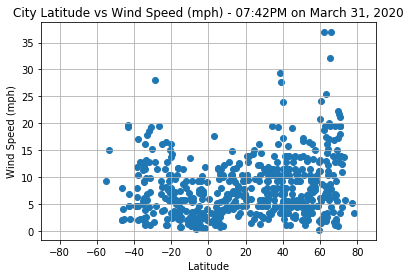

In [12]:
#Wind Speed mph vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Wind Speed (mph)")

#Wind speed vs latitude shows the lower the temperature the higher the wind speed is.

In [13]:
#Northern Hemisphere dataframe
NH_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
NH_weather_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,Cherskiy,68.75,161.30,9.81,91,7,9.22
2,Belaya Gora,68.53,146.42,12.92,91,86,2.26
3,Hilo,19.73,-155.09,68.07,73,75,6.93
4,Lingsugūr,16.17,76.52,85.93,23,73,8.34
8,Kapaa,22.08,-159.32,76.71,65,1,13.87


In [14]:
#Southern Hemisphere dataframe
SH_weather_df = weather_df.loc[weather_df["Latitude"] < 0]
SH_weather_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
1,Touros,-5.20,-35.46,77.00,94,40,4.70
5,Vaini,-21.20,-175.20,84.20,74,20,10.29
6,Esperance,-33.87,121.90,68.00,64,69,1.12
7,Port Alfred,-33.59,26.89,62.01,98,56,5.99
9,Castro,-24.79,-50.01,65.10,58,65,3.74


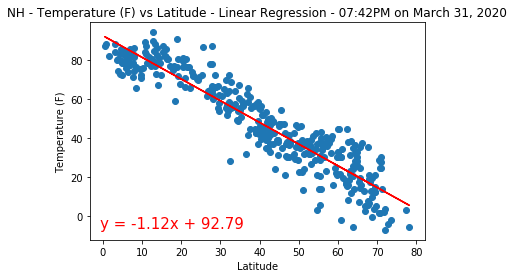

In [23]:
#Northern Hemisphere - Temperature (F) vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Temperature (F)", 100, 50, "NH")

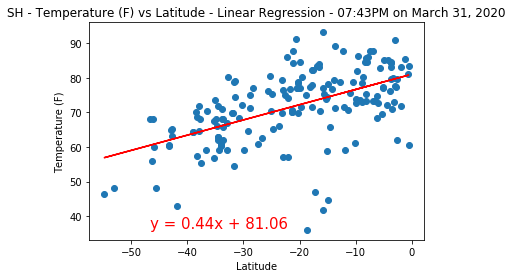

In [25]:
#Southern Hemisphere - Temperature (F) vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Temperature (F)", 150, 50, "SH")

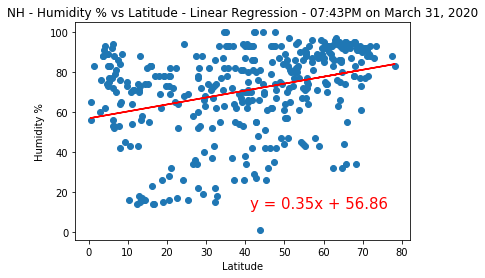

In [26]:
#Northern Hemisphere - Humidity vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Humidity %", 250, 70, "NH")

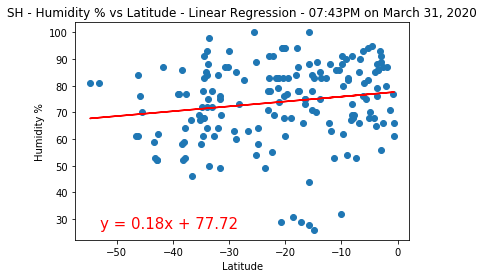

In [27]:
#Southern Hemisphere - Humidity vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Humidity %", 100, 50, "SH")

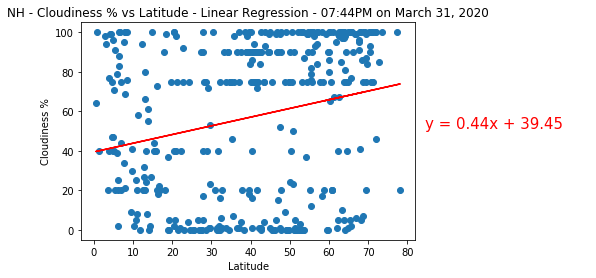

In [31]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Cloudiness %", 425, 150, "NH")

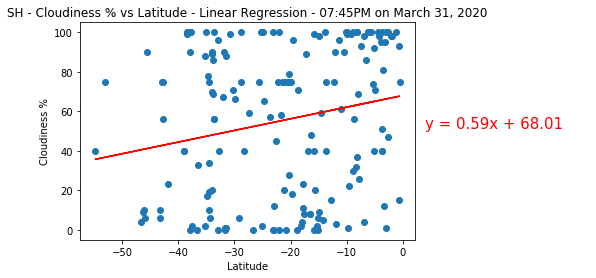

In [32]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Cloudiness %", 425, 150, "SH")

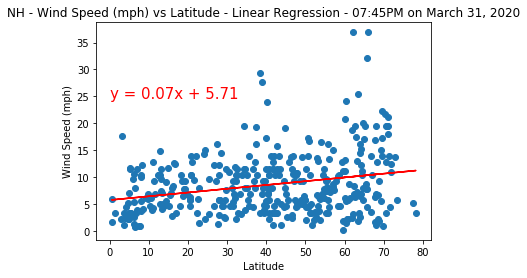

In [35]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Wind Speed (mph)", 110, 180, "NH")

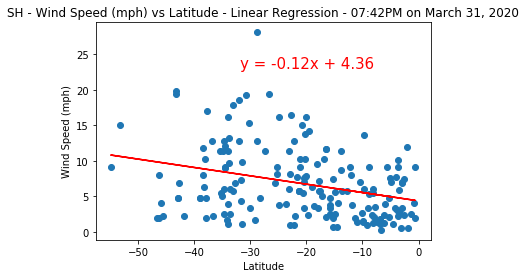

In [22]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Wind Speed (mph)", 240, 210, "SH")